In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Setting seaborn style for better visuals
sns.set(style="whitegrid")

df = pd.read_csv("XAUUSD_Hourly_Cleaned.csv")

In [2]:
df.head()

,Open,High,Low,Close,TickVolume,Spread,datetime,Target_Close
0,3289.25,3290.21,3271.43,3274.02,5132,7,2025-05-01 01:00:00,3272.69
1,3274.28,3285.10,3269.83,3272.69,4855,7,2025-05-01 02:00:00,3246.51
2,3273.13,3276.33,3241.21,3246.51,8490,7,2025-05-01 03:00:00,3238.92
3,3246.51,3251.34,3234.38,3238.92,6694,7,2025-05-01 04:00:00,3241.58
4,3238.95,3251.74,3235.17,3241.58,5156,7,2025-05-01 05:00:00,3229.51


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          298 non-null    float64
 1   High          298 non-null    float64
 2   Low           298 non-null    float64
 3   Close         298 non-null    float64
 4   TickVolume    298 non-null    int64  
 5   Spread        298 non-null    int64  
 6   datetime      298 non-null    object 
 7   Target_Close  298 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 18.8+ KB


In [4]:
#Basic Data Overview
print("=== Basic Data Overview ===")
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nTime Range:")
print(f"Start: {df['datetime'].min()}")
print(f"End: {df['datetime'].max()}")
print(f"Total Hours: {(df['datetime'].max() - df['datetime'].min()).total_seconds() / 3600}")

=== Basic Data Overview ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          298 non-null    float64
 1   High          298 non-null    float64
 2   Low           298 non-null    float64
 3   Close         298 non-null    float64
 4   TickVolume    298 non-null    int64  
 5   Spread        298 non-null    int64  
 6   datetime      298 non-null    object 
 7   Target_Close  298 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 18.8+ KB
None

Summary Statistics:
              Open         High          Low        Close    TickVolume  \
count   298.000000   298.000000   298.000000   298.000000    298.000000   
mean   3272.133725  3279.192517  3264.564765  3271.962013   7901.751678   
std      68.452747    68.669211    68.197205    68.545714   2881.091974   
min    3129.030000  3143.060000  3

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [5]:
#Univariate Analysis
print("\n=== Univariate Analysis ===")


=== Univariate Analysis ===


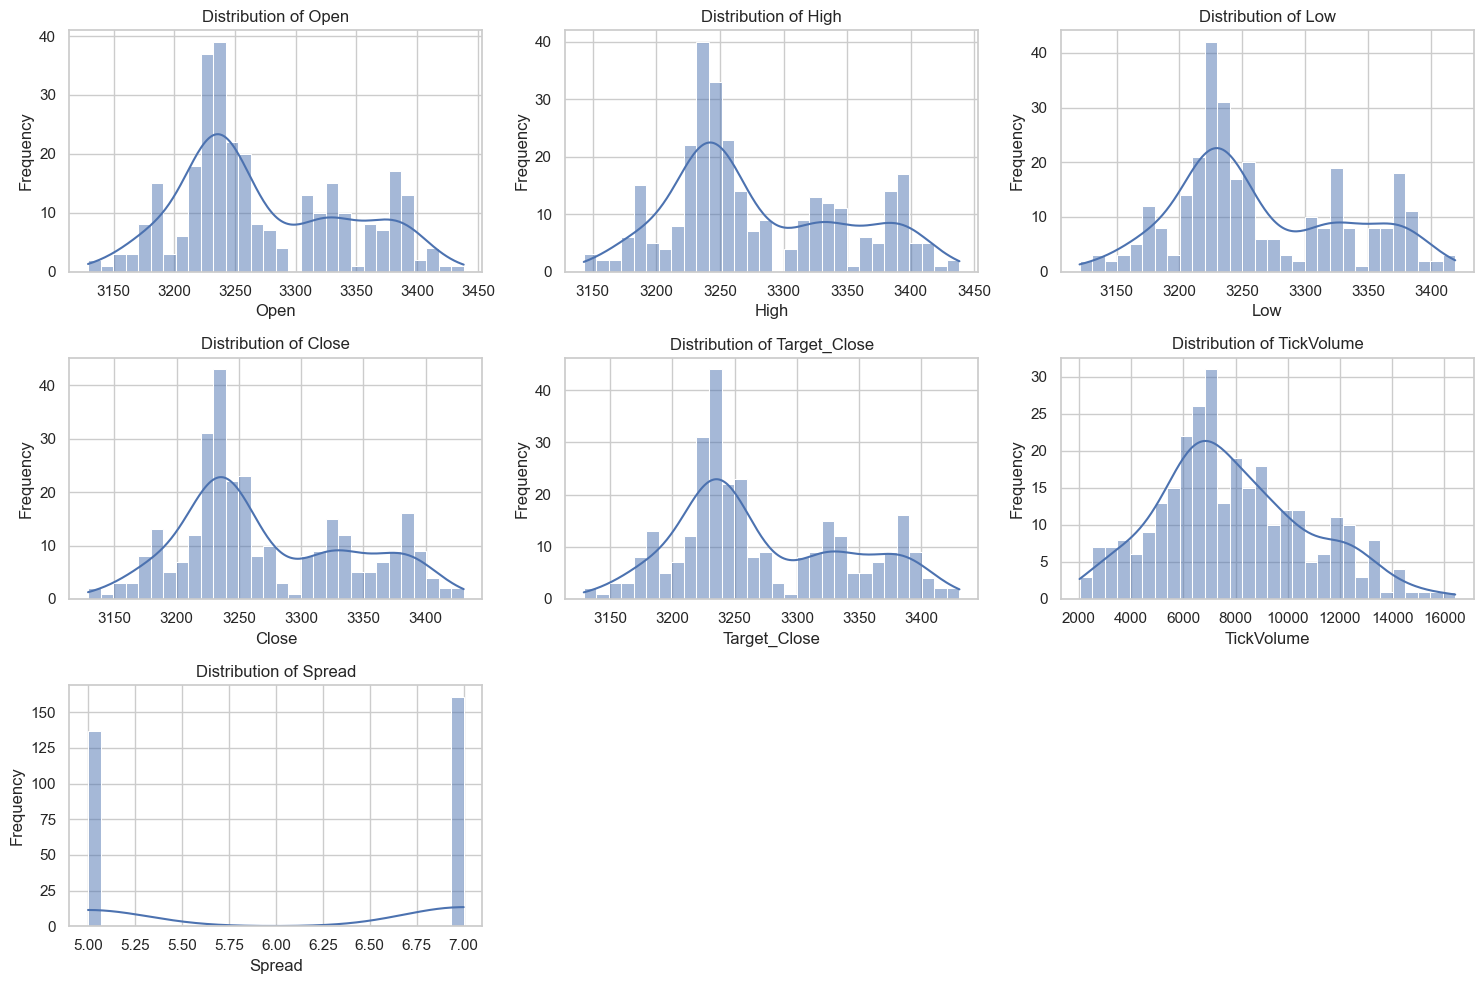

In [6]:
# Plot histograms for numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Target_Close', 'TickVolume', 'Spread']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('univariate_histograms.png')
plt.show()

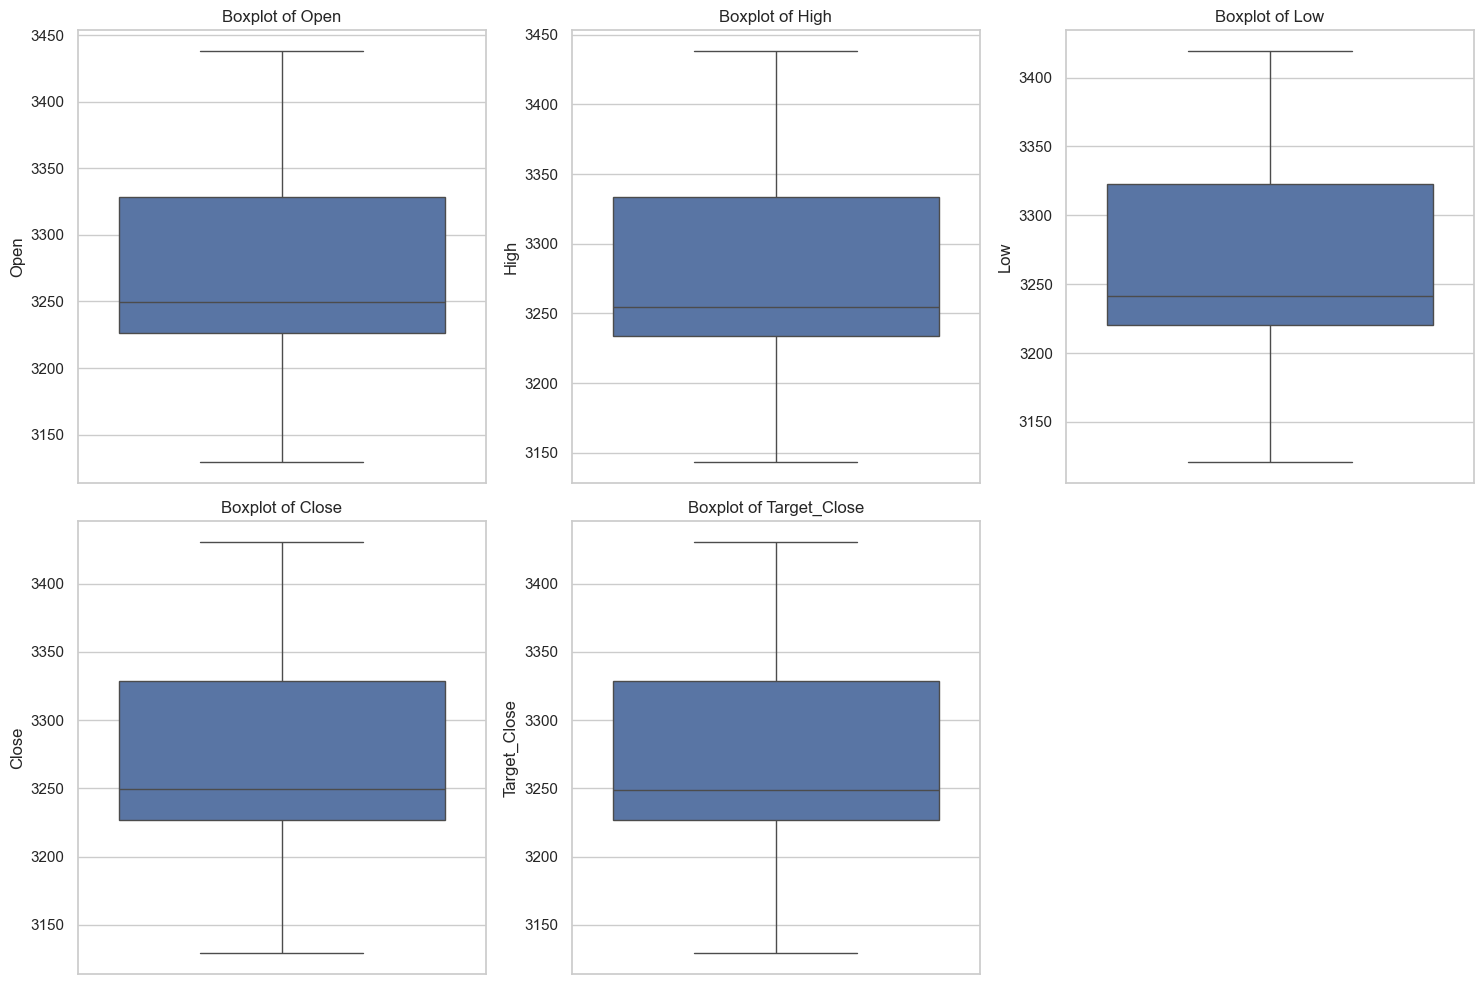

In [7]:
# Boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Target_Close'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('price_boxplots.png')
plt.show()


=== Bivariate Analysis ===


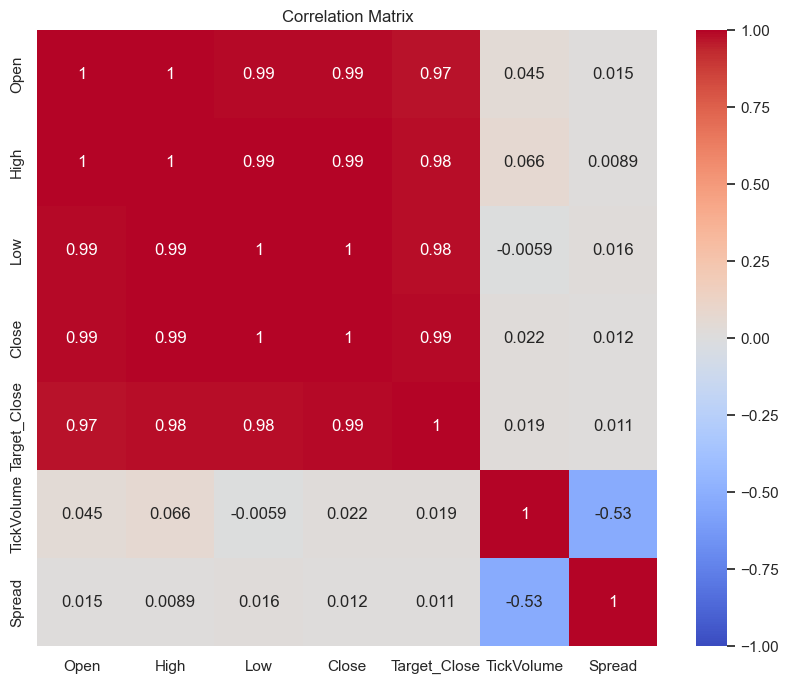

In [8]:
#Bivariate Analysis
print("\n=== Bivariate Analysis ===")
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

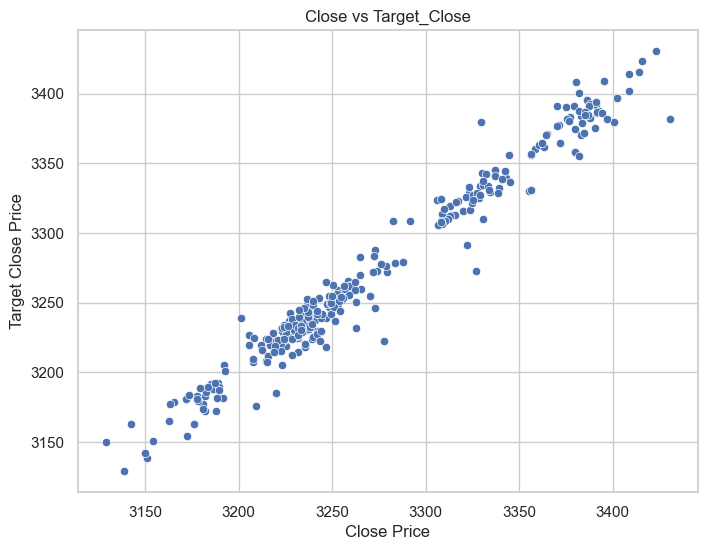

In [9]:
# Scatter plot: Close vs Target_Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Close'], y=df['Target_Close'])
plt.title('Close vs Target_Close')
plt.xlabel('Close Price')
plt.ylabel('Target Close Price')
plt.savefig('close_vs_target_close.png')
plt.show()


=== Time Series Analysis ===


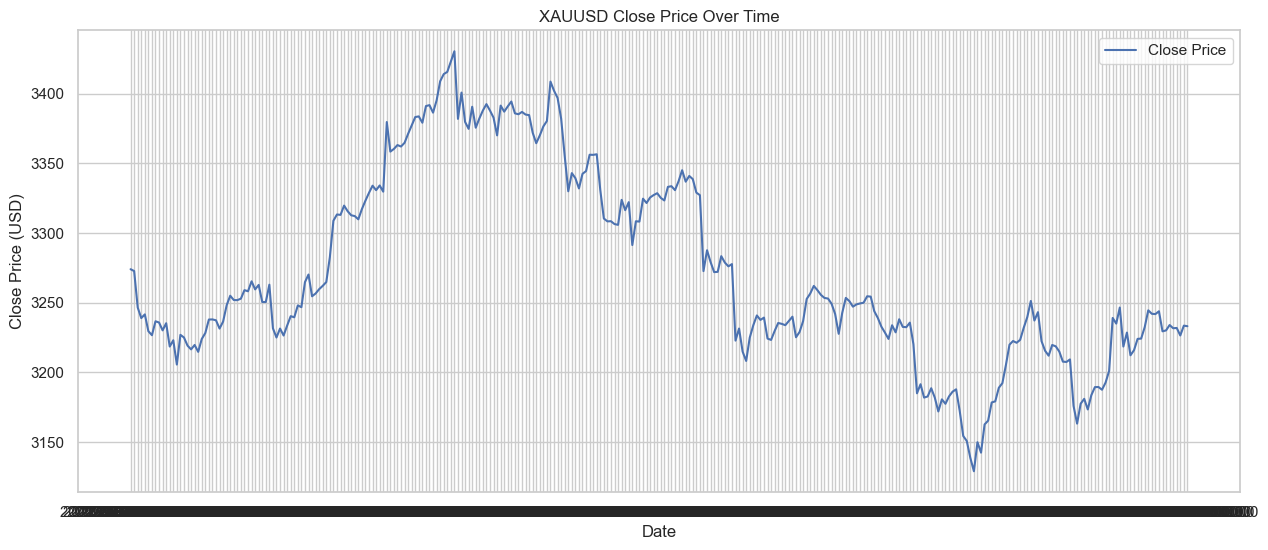

In [10]:
# Step 5: Time Series Analysis
print("\n=== Time Series Analysis ===")
# Plot Close price over time
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['Close'], label='Close Price')
plt.title('XAUUSD Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.savefig('close_price_timeseries.png')
plt.show()

In [11]:
# Hourly price patterns
df['hour'] = df['datetime'].dt.hour
hourly_avg = df.groupby('hour')['Close'].mean()
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Close Price by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Close Price')
plt.savefig('hourly_price_patterns.png')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [12]:
#Outlier Detection
print("\n=== Outlier Detection ===")
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

for col in ['Open', 'High', 'Low', 'Close', 'Target_Close']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")



=== Outlier Detection ===
Outliers in Open: 0
Outliers in High: 0
Outliers in Low: 0
Outliers in Close: 0
Outliers in Target_Close: 0


In [15]:
# Anomaly Detection
print("\n=== Anomaly Detection ===")
# Identify large hourly price changes
df['Price_Change'] = df['Close'].diff().abs()
threshold = df['Price_Change'].quantile(0.95)  # Top 5% of price changes
anomalies = df[df['Price_Change'] > threshold][['datetime', 'Close', 'Price_Change']]


=== Anomaly Detection ===


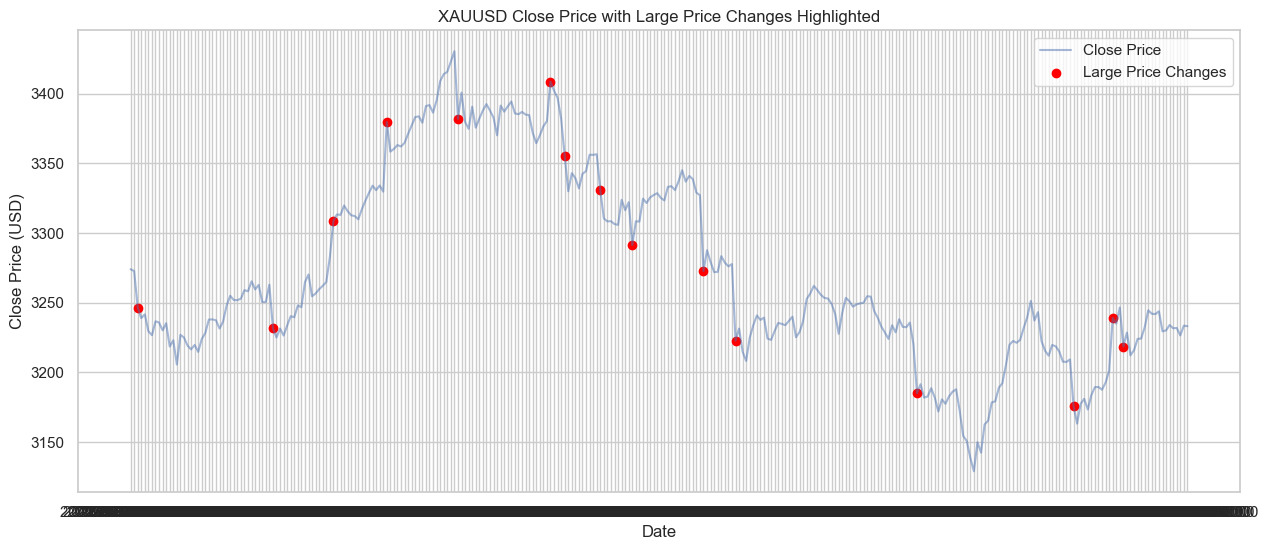

Large Price Changes (Top 5%):
                datetime    Close  Price_Change
2    2025-05-01 03:00:00  3246.51         26.18
40   2025-05-02 18:00:00  3231.60         31.30
57   2025-05-05 12:00:00  3308.81         26.11
72   2025-05-06 04:00:00  3379.65         49.98
92   2025-05-07 01:00:00  3381.92         48.54
118  2025-05-08 04:00:00  3408.67         28.25
122  2025-05-08 08:00:00  3355.23         26.86
132  2025-05-08 18:00:00  3330.78         25.73
141  2025-05-09 04:00:00  3291.36         30.79
161  2025-05-12 01:00:00  3272.65         54.50
170  2025-05-12 10:00:00  3222.77         54.91
221  2025-05-14 15:00:00  3184.93         35.23
265  2025-05-16 13:00:00  3175.86         33.40
276  2025-05-19 01:00:00  3239.03         38.03
279  2025-05-19 04:00:00  3218.49         28.00


In [16]:
# Plot Close price with anomalies highlighted
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['Close'], label='Close Price', alpha=0.5)
plt.scatter(anomalies['datetime'], anomalies['Close'], color='red', label='Large Price Changes', marker='o')
plt.title('XAUUSD Close Price with Large Price Changes Highlighted')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.savefig('anomalies_timeseries.png')
plt.show()
print("Large Price Changes (Top 5%):")
print(anomalies)

In [17]:
#Summary and Insights
print("\n=== Key Insights ===")
print("- The dataset spans from", df['datetime'].min(), "to", df['datetime'].max())
print("- Price columns (Open, High, Low, Close, Target_Close) are highly correlated, as expected.")
print("- TickVolume shows variability, potentially indicating trading activity spikes.")
print("- Spread is mostly consistent (after cleaning), with minor variations.")
print("- Time series plot shows trends and potential volatility periods.")
print("- Hourly analysis reveals intraday patterns, useful for trading strategies.")


=== Key Insights ===
- The dataset spans from 2025-05-01 01:00:00 to 2025-05-19 22:00:00
- Price columns (Open, High, Low, Close, Target_Close) are highly correlated, as expected.
- TickVolume shows variability, potentially indicating trading activity spikes.
- Spread is mostly consistent (after cleaning), with minor variations.
- Time series plot shows trends and potential volatility periods.
- Hourly analysis reveals intraday patterns, useful for trading strategies.


In [18]:
# Summary of New Insights
print("\n=== New Insights ===")
print("- Volatility peaks correspond to significant price movements (e.g., around May 6-7).")
print("- SMA crossovers (20 vs 50) indicate potential trend changes.")
print(f"- RSI shows periods of overbought (>70) or oversold (<30) conditions.")
print("- Lagged Target_Close correlations suggest short-term price predictability.")
print("- Weekday analysis reveals price and volume patterns, potentially tied to market sessions.")
print(f"- {len(anomalies)} large price changes detected, indicating potential market events.")


=== New Insights ===
- Volatility peaks correspond to significant price movements (e.g., around May 6-7).
- SMA crossovers (20 vs 50) indicate potential trend changes.
- RSI shows periods of overbought (>70) or oversold (<30) conditions.
- Lagged Target_Close correlations suggest short-term price predictability.
- Weekday analysis reveals price and volume patterns, potentially tied to market sessions.
- 15 large price changes detected, indicating potential market events.
